# Comprehensive Exploratory Data Analysis - Phase 3 Dataset

This notebook performs a detailed EDA on the `consolidated_data_phase3.csv` dataset, including:
- Data loading and initial inspection
- Missing value analysis
- Distribution analysis
- Correlation analysis
- Outlier detection
- Principal Component Analysis (PCA)
- K-Nearest Neighbors clustering/visualization
- Temporal analysis
- Feature relationship analysis

All visualizations are saved as PNG files.



## 1. Setup and Data Loading



In [1]:
# Install required libraries
import sys
print(f"Python version: {sys.version}")

%pip install -q pandas numpy matplotlib seaborn scikit-learn scipy

print("\n" + "="*80)
print("LIBRARIES INSTALLATION COMPLETE")
print("="*80)



Python version: 3.12.0 (tags/v3.12.0:0fb18b0, Oct  2 2023, 13:03:39) [MSC v.1935 64 bit (AMD64)]
Note: you may need to restart the kernel to use updated packages.

LIBRARIES INSTALLATION COMPLETE



[notice] A new release of pip is available: 23.2.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
# Import all required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Set plotting style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

print("✓ All libraries imported successfully")



✓ All libraries imported successfully


In [3]:
# Load the dataset
print("="*80)
print("LOADING PHASE 3 CONSOLIDATED DATASET")
print("="*80)

df = pd.read_csv('consolidated_data_phase3.csv')

print(f"\nDataset loaded successfully!")
print(f"Shape: {df.shape[0]:,} rows × {df.shape[1]} columns")
print(f"Memory usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
print(f"\nColumn types:")
print(df.dtypes.value_counts())

print(f"\nFirst few rows:")
df.head()



LOADING PHASE 3 CONSOLIDATED DATASET

Dataset loaded successfully!
Shape: 14,007 rows × 54 columns
Memory usage: 6.41 MB

Column types:
float64    50
int64       3
object      1
Name: count, dtype: int64

First few rows:


,fips,county_name,Albedo_inst,AvgSurfT_inst,CanopInt_inst,ECanop_tavg,ESoil_tavg,Evap_tavg,LWdown_f_tavg,Lwnet_tavg,...,govt_programs_federal_receipts_usd,income_farmrelated_receipts_per_operation_usd,dist_km_ethanol,prism_ppt_in,prism_tmin_degf,prism_tmean_degf,prism_tmax_degf,prism_tdmean_degf,prism_vpdmin_hpa,prism_vpdmax_hpa
0,27001,Aitkin,50.244838,264.970104,0.175215,0.102708,2.679327,0.000004,243.178305,-34.681887,...,285000.0,4076.0,195.803559,1.30,10.8,21.2,31.7,16.4,0.15,2.54
1,27001,Aitkin,16.406966,274.549484,0.248350,2.742879,18.275329,0.000010,269.469801,-50.319656,...,285000.0,4076.0,195.803559,1.80,22.8,34.5,46.2,25.3,0.25,6.42
2,27001,Aitkin,12.855410,279.125545,0.081250,8.132987,23.065468,0.000022,273.135967,-68.612196,...,285000.0,4076.0,195.803559,1.48,28.6,40.5,52.3,27.5,0.41,9.65
3,27001,Aitkin,11.453104,287.598783,0.109034,24.729721,16.553244,0.000043,321.866271,-64.330528,...,285000.0,4076.0,195.803559,3.08,43.4,55.4,67.4,43.7,0.56,14.35
4,27001,Aitkin,13.404246,289.296851,0.154898,39.082773,4.174892,0.000054,342.087140,-54.639789,...,285000.0,4076.0,195.803559,3.62,47.7,58.8,70.0,50.5,0.43,12.57


## 2. Initial Data Inspection



In [4]:
# Basic information
print("="*80)
print("BASIC DATASET INFORMATION")
print("="*80)

print("\nColumn Names:")
print(df.columns.tolist())

print("\n" + "="*80)
print("DATA TYPES")
print("="*80)
print(df.dtypes)

print("\n" + "="*80)
print("SUMMARY STATISTICS")
print("="*80)
df.describe()



BASIC DATASET INFORMATION

Column Names:
['fips', 'county_name', 'Albedo_inst', 'AvgSurfT_inst', 'CanopInt_inst', 'ECanop_tavg', 'ESoil_tavg', 'Evap_tavg', 'LWdown_f_tavg', 'Lwnet_tavg', 'PotEvap_tavg', 'Psurf_f_inst', 'Qair_f_inst', 'Qg_tavg', 'Qh_tavg', 'Qle_tavg', 'Qs_acc', 'Qsb_acc', 'Qsm_acc', 'Rainf_f_tavg', 'Rainf_tavg', 'RootMoist_inst', 'SWE_inst', 'SWdown_f_tavg', 'SnowDepth_inst', 'Snowf_tavg', 'SoilMoi0_10cm_inst', 'SoilMoi100_200cm_inst', 'SoilMoi10_40cm_inst', 'SoilMoi40_100cm_inst', 'SoilTMP0_10cm_inst', 'SoilTMP100_200cm_inst', 'SoilTMP10_40cm_inst', 'SoilTMP40_100cm_inst', 'Swnet_tavg', 'Tair_f_inst', 'Tveg_tavg', 'Wind_f_inst', 'year', 'month', 'corn_production_bu', 'corn_acres_planted', 'diesel_usd_gal', 'income_farmrelated_receipts_total_usd', 'govt_programs_federal_receipts_usd', 'income_farmrelated_receipts_per_operation_usd', 'dist_km_ethanol', 'prism_ppt_in', 'prism_tmin_degf', 'prism_tmean_degf', 'prism_tmax_degf', 'prism_tdmean_degf', 'prism_vpdmin_hpa', 'pris

,fips,Albedo_inst,AvgSurfT_inst,CanopInt_inst,ECanop_tavg,ESoil_tavg,Evap_tavg,LWdown_f_tavg,Lwnet_tavg,PotEvap_tavg,...,govt_programs_federal_receipts_usd,income_farmrelated_receipts_per_operation_usd,dist_km_ethanol,prism_ppt_in,prism_tmin_degf,prism_tmean_degf,prism_tmax_degf,prism_tdmean_degf,prism_vpdmin_hpa,prism_vpdmax_hpa
count,14007.000000,14007.000000,14007.000000,14007.000000,14007.000000,14007.000000,14007.000000,14007.000000,14007.000000,14007.000000,...,1.400700e+04,14007.000000,14007.000000,14007.000000,14007.000000,14007.000000,14007.000000,14007.000000,14007.000000,14007.000000
mean,27087.000000,22.039518,282.806930,0.194746,15.849896,14.717405,0.000032,311.121543,-53.766574,152.758592,...,4.900029e+06,14122.584708,142.599792,3.011437,39.012879,49.471550,59.931256,39.801007,0.897401,11.827789
std,50.227948,16.892950,11.686197,0.115758,13.323969,12.742280,0.000020,52.364557,9.197882,86.718810,...,3.923033e+06,9608.646931,111.671650,2.153904,20.522300,20.774506,21.107278,19.145754,0.640022,6.853976
min,27001.000000,7.205653,252.061431,0.003066,0.000000,0.021714,0.000001,181.349854,-86.912903,4.236935,...,4.100000e+04,442.000000,0.445526,0.010000,-15.900000,-2.900000,6.300000,-7.800000,0.000000,0.570000
25%,27043.000000,12.201974,273.681443,0.118109,1.793507,4.277900,0.000012,267.776865,-60.229424,68.559650,...,1.582000e+06,6979.000000,60.373972,1.330000,23.200000,32.550000,42.100000,24.500000,0.380000,4.800000
50%,27087.000000,13.914308,286.852761,0.152721,15.124566,10.946391,0.000032,326.139410,-54.193024,177.909213,...,4.652000e+06,11566.000000,107.304570,2.580000,45.000000,55.600000,66.400000,42.900000,0.780000,13.280000
75%,27131.000000,24.762717,292.765766,0.225982,27.178066,22.217966,0.000050,357.070158,-47.549642,216.879233,...,6.605000e+06,19730.000000,195.803559,4.200000,57.200000,67.900000,78.600000,57.600000,1.250000,17.165000
max,27173.000000,76.970053,300.114064,0.500000,56.070932,74.492115,0.000082,395.658511,-26.377084,391.190098,...,5.099800e+07,115641.000000,444.054699,18.760000,69.100000,78.800000,90.000000,69.600000,5.160000,36.110000


In [5]:
# Identify key columns
ID_COLS = ['fips', 'county_name', 'year', 'month'] if all(col in df.columns for col in ['fips', 'county_name', 'year', 'month']) else ['fips', 'year']
TARGET_COL = 'corn_production_bu' if 'corn_production_bu' in df.columns else None

print("Key Columns Identified:")
print(f"  ID Columns: {ID_COLS}")
print(f"  Target Column: {TARGET_COL}")

# Get numeric feature columns
feature_cols = [col for col in df.columns 
                if col not in ID_COLS + ([TARGET_COL] if TARGET_COL else []) 
                and df[col].dtype in ['float64', 'int64']]

print(f"  Feature Columns: {len(feature_cols)}")
print(f"\nSample feature columns: {feature_cols[:10]}")



Key Columns Identified:
  ID Columns: ['fips', 'county_name', 'year', 'month']
  Target Column: corn_production_bu
  Feature Columns: 49

Sample feature columns: ['Albedo_inst', 'AvgSurfT_inst', 'CanopInt_inst', 'ECanop_tavg', 'ESoil_tavg', 'Evap_tavg', 'LWdown_f_tavg', 'Lwnet_tavg', 'PotEvap_tavg', 'Psurf_f_inst']


## 3. Missing Value Analysis



In [6]:
# Missing value analysis
print("="*80)
print("MISSING VALUE ANALYSIS")
print("="*80)

missing_count = df.isnull().sum()
missing_pct = (missing_count / len(df) * 100).round(2)

missing_df = pd.DataFrame({
    'Column': missing_count.index,
    'Missing_Count': missing_count.values,
    'Missing_Percent': missing_pct.values
})

missing_df = missing_df[missing_df['Missing_Count'] > 0].sort_values('Missing_Percent', ascending=False)

print(f"\nTotal columns with missing values: {len(missing_df)}")
print(f"Total missing values: {missing_count.sum():,}")

if len(missing_df) > 0:
    print("\nTop 10 columns with missing values:")
    print(missing_df.head(10).to_string(index=False))
else:
    print("\n✓ No missing values found!")



MISSING VALUE ANALYSIS

Total columns with missing values: 1
Total missing values: 2,247

Top 10 columns with missing values:
            Column  Missing_Count  Missing_Percent
corn_acres_planted           2247            16.04


✓ Saved: EDA_missing_values.png


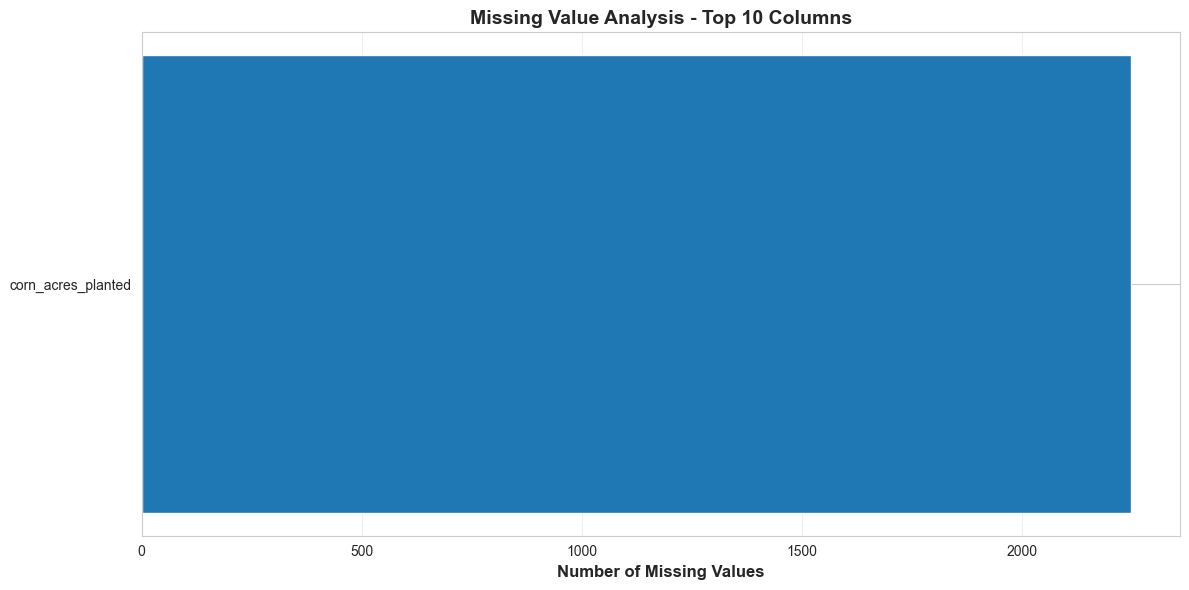

In [7]:
# Visualize missing values
if len(missing_df) > 0:
    plt.figure(figsize=(12, 6))
    
    # Plot top 10 columns with most missing values
    top_missing = missing_df.head(10)
    
    plt.barh(range(len(top_missing)), top_missing['Missing_Count'].values)
    plt.yticks(range(len(top_missing)), top_missing['Column'].values)
    plt.xlabel('Number of Missing Values', fontsize=12, fontweight='bold')
    plt.title('Missing Value Analysis - Top 10 Columns', fontsize=14, fontweight='bold')
    plt.grid(axis='x', alpha=0.3)
    
    plt.tight_layout()
    plt.savefig('EDA_missing_values.png', dpi=300, bbox_inches='tight')
    print("✓ Saved: EDA_missing_values.png")
    plt.show()
else:
    print("No missing values to visualize.")



## 4. Target Variable Analysis



TARGET VARIABLE ANALYSIS

Target Variable: corn_production_bu
  Non-null count: 14,007
  Range: 0 - 56,755,000 bushels
  Mean: 13,841,265 bushels
  Median: 12,179,200 bushels
  Std Dev: 12,676,998 bushels
  Skewness: 0.6014
  Kurtosis: -0.6325

✓ Saved: EDA_target_distribution.png


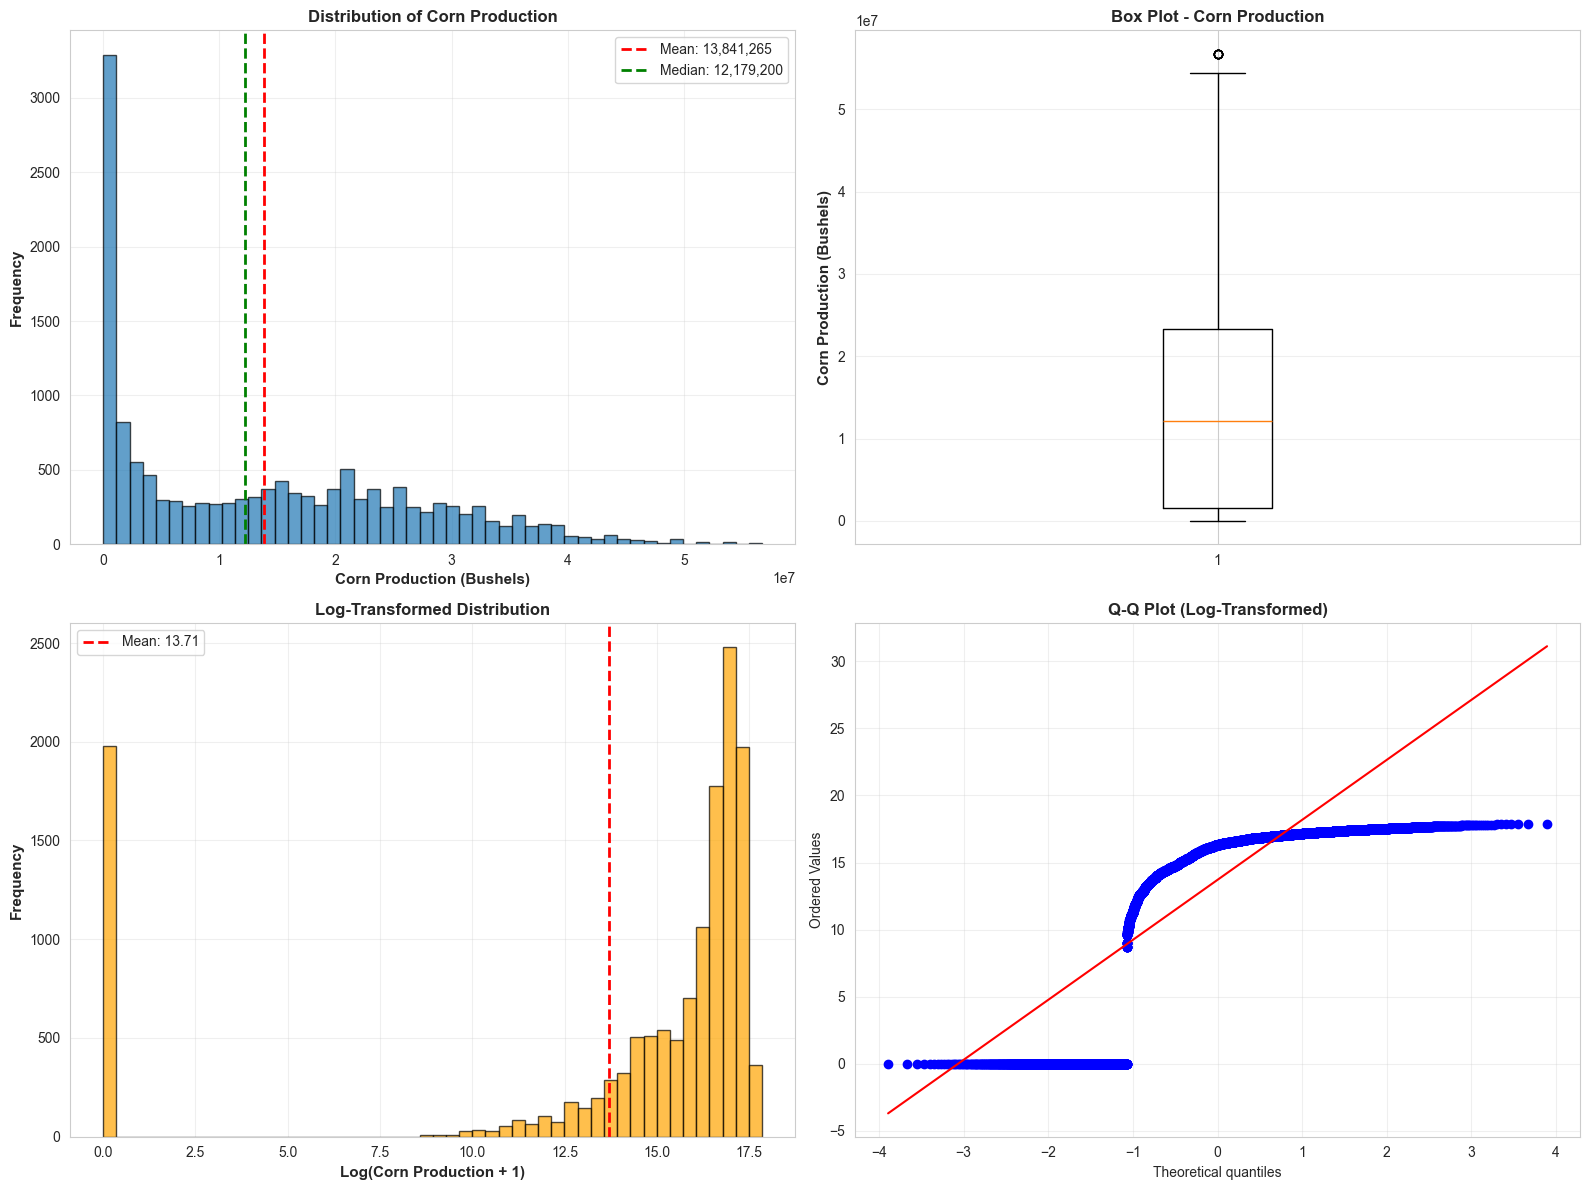

In [8]:
# Target variable analysis
if TARGET_COL and TARGET_COL in df.columns:
    print("="*80)
    print("TARGET VARIABLE ANALYSIS")
    print("="*80)
    
    target = df[TARGET_COL].dropna()
    
    print(f"\nTarget Variable: {TARGET_COL}")
    print(f"  Non-null count: {len(target):,}")
    print(f"  Range: {target.min():,.0f} - {target.max():,.0f} bushels")
    print(f"  Mean: {target.mean():,.0f} bushels")
    print(f"  Median: {target.median():,.0f} bushels")
    print(f"  Std Dev: {target.std():,.0f} bushels")
    print(f"  Skewness: {target.skew():.4f}")
    print(f"  Kurtosis: {target.kurtosis():.4f}")
    
    # Distribution plots
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    
    # Histogram
    axes[0, 0].hist(target, bins=50, edgecolor='black', alpha=0.7)
    axes[0, 0].axvline(target.mean(), color='r', linestyle='--', linewidth=2, label=f'Mean: {target.mean():,.0f}')
    axes[0, 0].axvline(target.median(), color='g', linestyle='--', linewidth=2, label=f'Median: {target.median():,.0f}')
    axes[0, 0].set_xlabel('Corn Production (Bushels)', fontsize=11, fontweight='bold')
    axes[0, 0].set_ylabel('Frequency', fontsize=11, fontweight='bold')
    axes[0, 0].set_title('Distribution of Corn Production', fontsize=12, fontweight='bold')
    axes[0, 0].legend()
    axes[0, 0].grid(alpha=0.3)
    
    # Box plot
    axes[0, 1].boxplot(target, vert=True)
    axes[0, 1].set_ylabel('Corn Production (Bushels)', fontsize=11, fontweight='bold')
    axes[0, 1].set_title('Box Plot - Corn Production', fontsize=12, fontweight='bold')
    axes[0, 1].grid(alpha=0.3, axis='y')
    
    # Log-transformed distribution
    target_log = np.log1p(target)
    axes[1, 0].hist(target_log, bins=50, edgecolor='black', alpha=0.7, color='orange')
    axes[1, 0].axvline(target_log.mean(), color='r', linestyle='--', linewidth=2, label=f'Mean: {target_log.mean():.2f}')
    axes[1, 0].set_xlabel('Log(Corn Production + 1)', fontsize=11, fontweight='bold')
    axes[1, 0].set_ylabel('Frequency', fontsize=11, fontweight='bold')
    axes[1, 0].set_title('Log-Transformed Distribution', fontsize=12, fontweight='bold')
    axes[1, 0].legend()
    axes[1, 0].grid(alpha=0.3)
    
    # Q-Q plot for normality check
    stats.probplot(target_log, dist="norm", plot=axes[1, 1])
    axes[1, 1].set_title('Q-Q Plot (Log-Transformed)', fontsize=12, fontweight='bold')
    axes[1, 1].grid(alpha=0.3)
    
    plt.tight_layout()
    plt.savefig('EDA_target_distribution.png', dpi=300, bbox_inches='tight')
    print("\n✓ Saved: EDA_target_distribution.png")
    plt.show()
    
else:
    print("Target variable not found in dataset.")



## 5. Temporal Analysis



TEMPORAL ANALYSIS

Year range: 2000 - 2022
Unique years: [np.int64(2000), np.int64(2001), np.int64(2002), np.int64(2003), np.int64(2004), np.int64(2005), np.int64(2006), np.int64(2007), np.int64(2008), np.int64(2009), np.int64(2010), np.int64(2011), np.int64(2012), np.int64(2013), np.int64(2014), np.int64(2015), np.int64(2016), np.int64(2017), np.int64(2018), np.int64(2019), np.int64(2020), np.int64(2021), np.int64(2022)]

✓ Saved: EDA_temporal_analysis.png


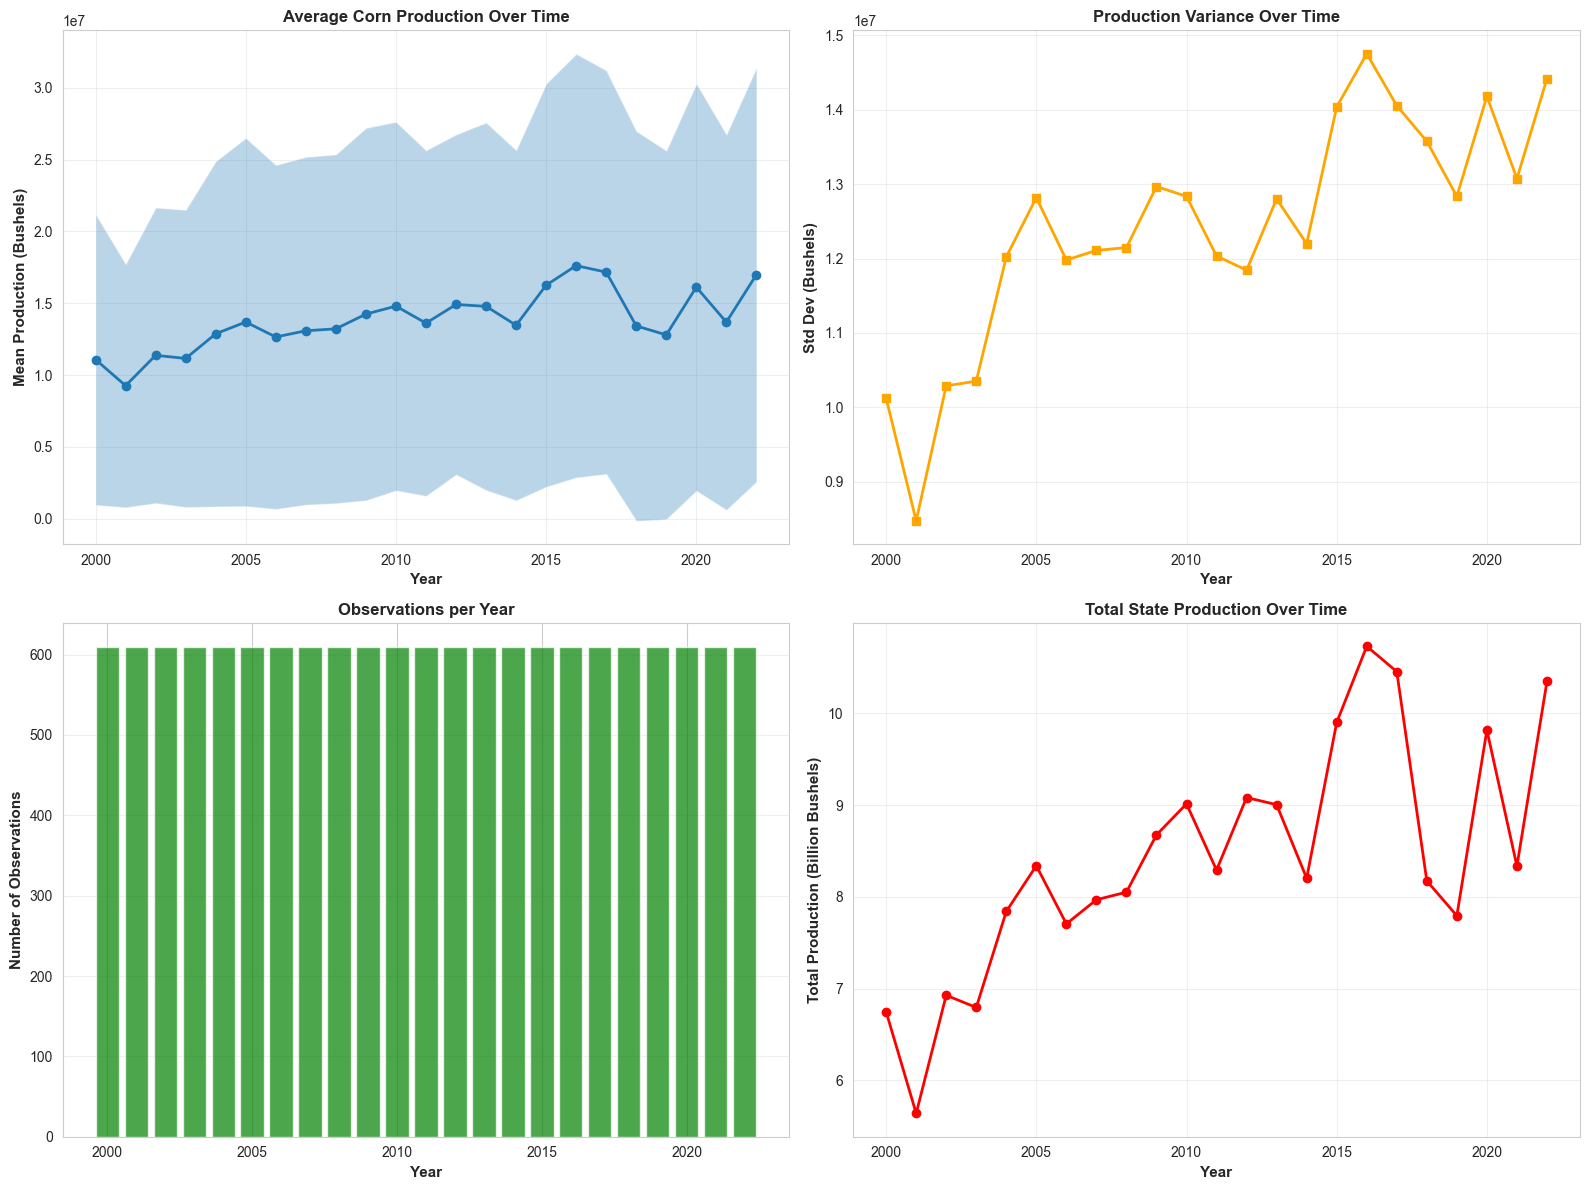


Temporal Summary:
 year  mean_production  std_production  count  total_production
 2000     1.108220e+07    1.012516e+07    609      6.749062e+09
 2001     9.263722e+06    8.474359e+06    609      5.641607e+09
 2002     1.137768e+07    1.028872e+07    609      6.929005e+09
 2003     1.115891e+07    1.035234e+07    609      6.795774e+09
 2004     1.287696e+07    1.202179e+07    609      7.842069e+09
 2005     1.369621e+07    1.281947e+07    609      8.340991e+09
 2006     1.265490e+07    1.198010e+07    609      7.706832e+09
 2007     1.308717e+07    1.210951e+07    609      7.970085e+09
 2008     1.322270e+07    1.214697e+07    609      8.052625e+09
 2009     1.424801e+07    1.296796e+07    609      8.677039e+09
 2010     1.480334e+07    1.283598e+07    609      9.015237e+09
 2011     1.361771e+07    1.203419e+07    609      8.293187e+09
 2012     1.491643e+07    1.184376e+07    609      9.084107e+09
 2013     1.478849e+07    1.280113e+07    609      9.006193e+09
 2014     1.347190e+0

In [9]:
# Temporal analysis
if 'year' in df.columns and TARGET_COL and TARGET_COL in df.columns:
    print("="*80)
    print("TEMPORAL ANALYSIS")
    print("="*80)
    
    temporal_df = df.groupby('year')[TARGET_COL].agg(['mean', 'std', 'count', 'sum']).reset_index()
    temporal_df.columns = ['year', 'mean_production', 'std_production', 'count', 'total_production']
    
    print(f"\nYear range: {df['year'].min()} - {df['year'].max()}")
    print(f"Unique years: {sorted(df['year'].unique())}")
    
    # Temporal plots
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    
    # Mean production over time
    axes[0, 0].plot(temporal_df['year'], temporal_df['mean_production'], marker='o', linewidth=2, markersize=6)
    axes[0, 0].fill_between(temporal_df['year'], 
                           temporal_df['mean_production'] - temporal_df['std_production'],
                           temporal_df['mean_production'] + temporal_df['std_production'],
                           alpha=0.3)
    axes[0, 0].set_xlabel('Year', fontsize=11, fontweight='bold')
    axes[0, 0].set_ylabel('Mean Production (Bushels)', fontsize=11, fontweight='bold')
    axes[0, 0].set_title('Average Corn Production Over Time', fontsize=12, fontweight='bold')
    axes[0, 0].grid(alpha=0.3)
    
    # Variance over time
    axes[0, 1].plot(temporal_df['year'], temporal_df['std_production'], marker='s', linewidth=2, markersize=6, color='orange')
    axes[0, 1].set_xlabel('Year', fontsize=11, fontweight='bold')
    axes[0, 1].set_ylabel('Std Dev (Bushels)', fontsize=11, fontweight='bold')
    axes[0, 1].set_title('Production Variance Over Time', fontsize=12, fontweight='bold')
    axes[0, 1].grid(alpha=0.3)
    
    # Count of observations per year
    axes[1, 0].bar(temporal_df['year'], temporal_df['count'], color='green', alpha=0.7)
    axes[1, 0].set_xlabel('Year', fontsize=11, fontweight='bold')
    axes[1, 0].set_ylabel('Number of Observations', fontsize=11, fontweight='bold')
    axes[1, 0].set_title('Observations per Year', fontsize=12, fontweight='bold')
    axes[1, 0].grid(alpha=0.3, axis='y')
    
    # Total production over time
    axes[1, 1].plot(temporal_df['year'], temporal_df['total_production']/1e9, marker='o', linewidth=2, markersize=6, color='red')
    axes[1, 1].set_xlabel('Year', fontsize=11, fontweight='bold')
    axes[1, 1].set_ylabel('Total Production (Billion Bushels)', fontsize=11, fontweight='bold')
    axes[1, 1].set_title('Total State Production Over Time', fontsize=12, fontweight='bold')
    axes[1, 1].grid(alpha=0.3)
    
    plt.tight_layout()
    plt.savefig('EDA_temporal_analysis.png', dpi=300, bbox_inches='tight')
    print("\n✓ Saved: EDA_temporal_analysis.png")
    plt.show()
    
    print("\nTemporal Summary:")
    print(temporal_df.to_string(index=False))
    
else:
    print("Year or target column not available for temporal analysis.")



## 6. Correlation Analysis



CORRELATION ANALYSIS

Top 15 Features Correlated with corn_production_bu:
corn_acres_planted                               0.961792
income_farmrelated_receipts_total_usd            0.688367
SoilMoi100_200cm_inst                            0.557286
govt_programs_federal_receipts_usd               0.474687
income_farmrelated_receipts_per_operation_usd    0.428815
ESoil_tavg                                       0.337488
Wind_f_inst                                      0.321320
SoilMoi10_40cm_inst                              0.226400
SoilMoi40_100cm_inst                             0.212355
SoilTMP100_200cm_inst                            0.188910
SoilMoi0_10cm_inst                               0.186986
SoilTMP40_100cm_inst                             0.141952
fips                                             0.135541
SoilTMP10_40cm_inst                              0.131740
prism_vpdmin_hpa                                 0.123564

Bottom 15 Features Correlated with corn_production_bu:


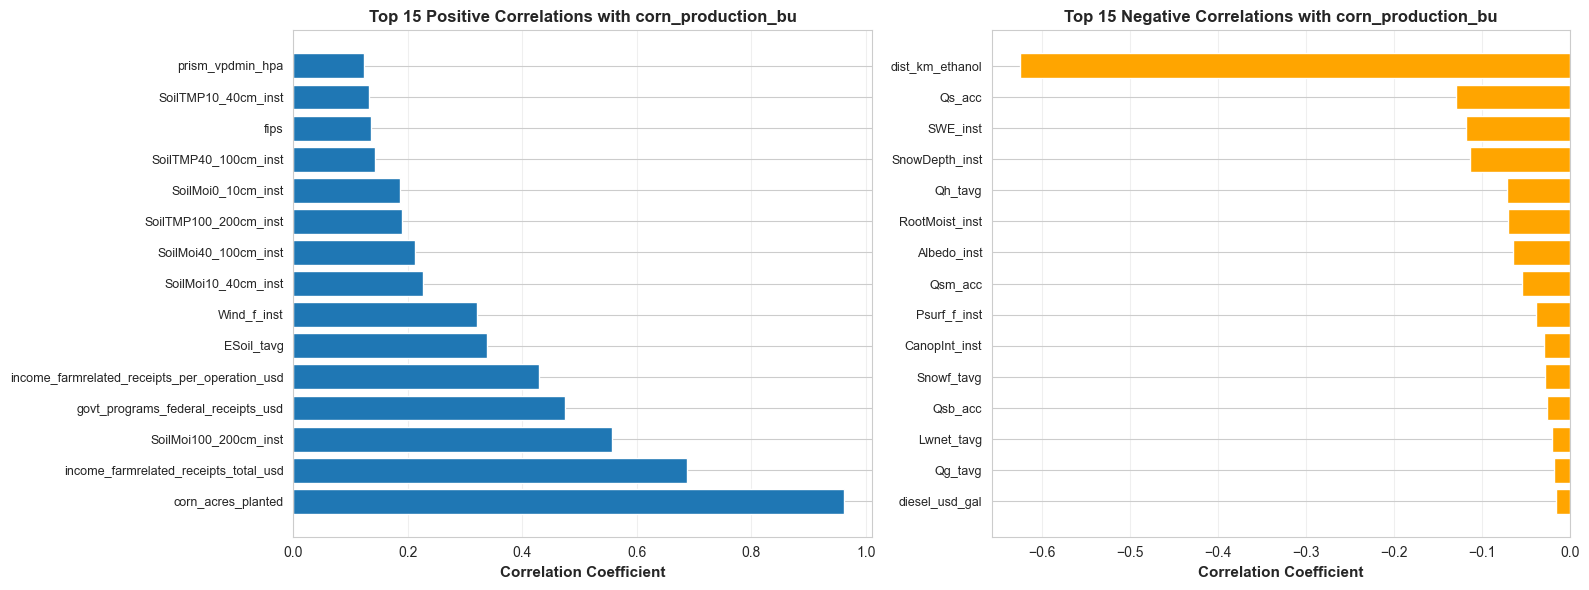

✓ Saved: EDA_correlation_heatmap.png


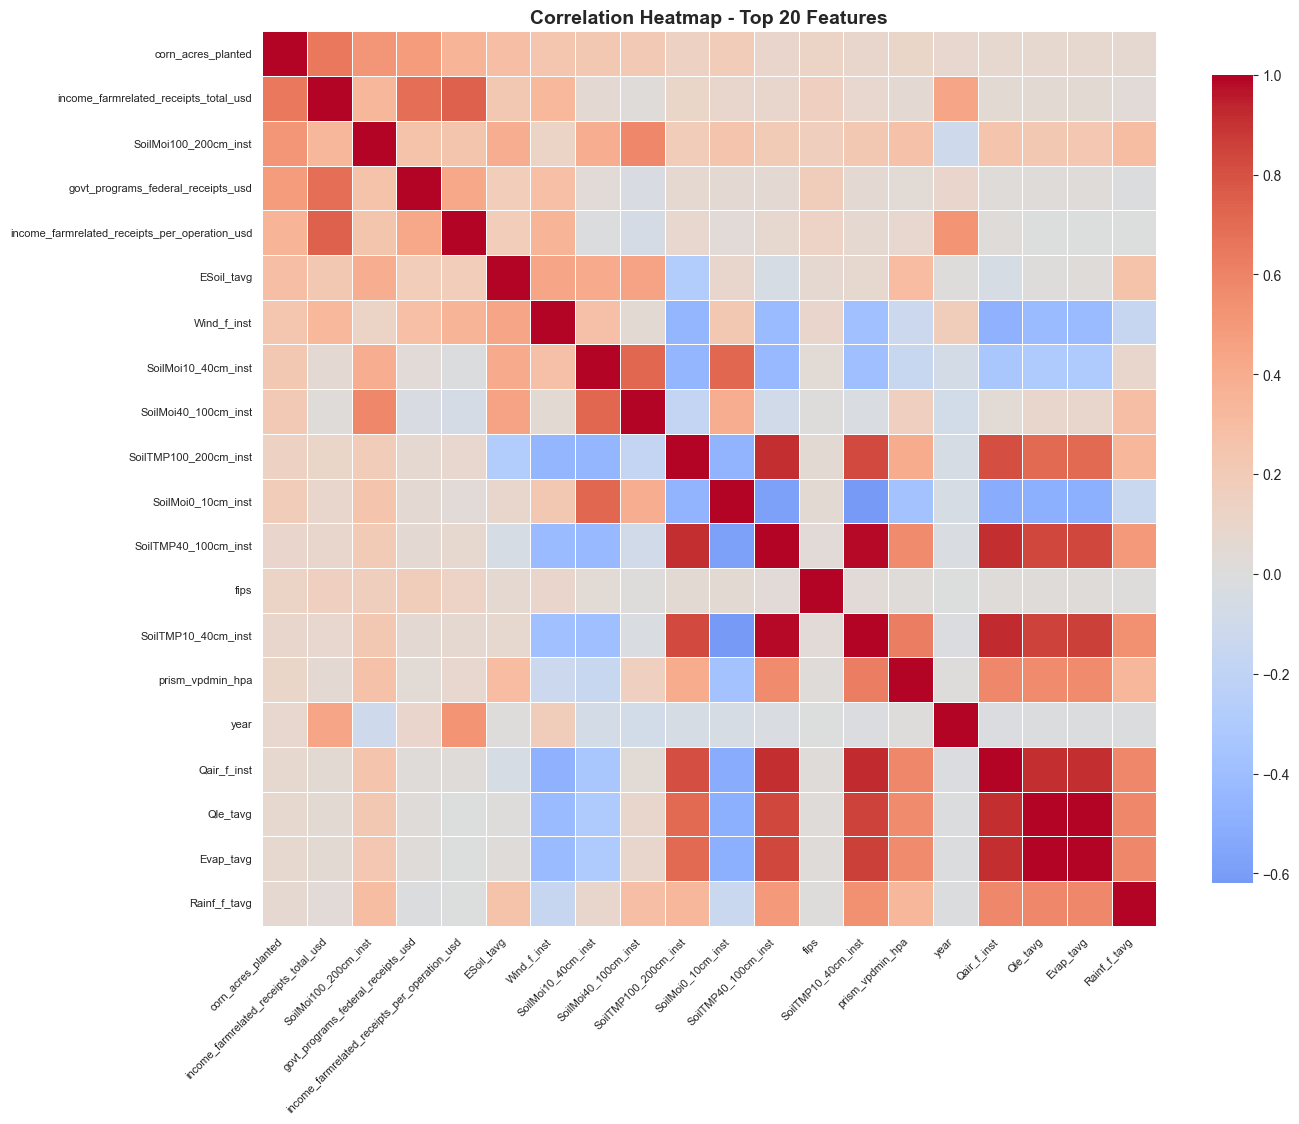

In [10]:
# Correlation analysis
print("="*80)
print("CORRELATION ANALYSIS")
print("="*80)

# Select numeric columns for correlation
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

# Calculate correlation matrix
corr_matrix = df[numeric_cols].corr()

# Correlation with target
if TARGET_COL and TARGET_COL in corr_matrix.columns:
    target_corr = corr_matrix[TARGET_COL].drop(TARGET_COL).sort_values(ascending=False)
    
    print(f"\nTop 15 Features Correlated with {TARGET_COL}:")
    print(target_corr.head(15).to_string())
    
    print(f"\nBottom 15 Features Correlated with {TARGET_COL}:")
    print(target_corr.tail(15).to_string())
    
    # Plot top correlations
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    
    # Top positive correlations
    top_pos = target_corr.head(15)
    axes[0].barh(range(len(top_pos)), top_pos.values)
    axes[0].set_yticks(range(len(top_pos)))
    axes[0].set_yticklabels(top_pos.index, fontsize=9)
    axes[0].set_xlabel('Correlation Coefficient', fontsize=11, fontweight='bold')
    axes[0].set_title(f'Top 15 Positive Correlations with {TARGET_COL}', fontsize=12, fontweight='bold')
    axes[0].grid(alpha=0.3, axis='x')
    
    # Top negative correlations
    top_neg = target_corr.tail(15)
    axes[1].barh(range(len(top_neg)), top_neg.values, color='orange')
    axes[1].set_yticks(range(len(top_neg)))
    axes[1].set_yticklabels(top_neg.index, fontsize=9)
    axes[1].set_xlabel('Correlation Coefficient', fontsize=11, fontweight='bold')
    axes[1].set_title(f'Top 15 Negative Correlations with {TARGET_COL}', fontsize=12, fontweight='bold')
    axes[1].grid(alpha=0.3, axis='x')
    
    plt.tight_layout()
    plt.savefig('EDA_correlation_target.png', dpi=300, bbox_inches='tight')
    print("\n✓ Saved: EDA_correlation_target.png")
    plt.show()

# Correlation heatmap for top features
if len(feature_cols) > 0:
    # Select top 20 features by correlation with target (if available) or variance
    if TARGET_COL and TARGET_COL in df.columns:
        top_features = target_corr.head(20).index.tolist()
    else:
        # Select features with highest variance
        feature_variance = df[feature_cols].var().sort_values(ascending=False)
        top_features = feature_variance.head(20).index.tolist()
    
    # Calculate correlation matrix for top features
    top_corr = df[top_features].corr()
    
    # Plot heatmap
    plt.figure(figsize=(14, 12))
    sns.heatmap(top_corr, annot=False, fmt='.2f', cmap='coolwarm', center=0,
                square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})
    plt.title('Correlation Heatmap - Top 20 Features', fontsize=14, fontweight='bold')
    plt.xticks(rotation=45, ha='right', fontsize=8)
    plt.yticks(rotation=0, fontsize=8)
    plt.tight_layout()
    plt.savefig('EDA_correlation_heatmap.png', dpi=300, bbox_inches='tight')
    print("✓ Saved: EDA_correlation_heatmap.png")
    plt.show()
else:
    print("No feature columns available for correlation analysis.")



## 7. Outlier Detection and Analysis



OUTLIER DETECTION (3×IQR METHOD)

Features with outliers:
       Feature  Outliers  Outlier_Percent  Lower_Bound  Upper_Bound
SnowDepth_inst      1777        12.686514    -0.093339     0.124452
      SWE_inst      1770        12.636539   -17.197298    22.929731
       Qsb_acc      1506        10.751767    -0.044767     0.060374
       Qsm_acc      1302         9.295352    -0.131686     0.175581
        Qs_acc       864         6.168344    -0.082354     0.118800
   Albedo_inst       697         4.976083   -25.480256    62.444946
    Snowf_tavg       282         2.013279    -0.000015     0.000020
       Qg_tavg        12         0.085671   -19.577516    32.445765
  Rainf_f_tavg        10         0.071393    -0.000051     0.000111
RootMoist_inst         3         0.021418  -139.448190   650.627496
    Rainf_tavg         2         0.014279    -0.000074     0.000127

✓ Saved: EDA_outlier_detection.png


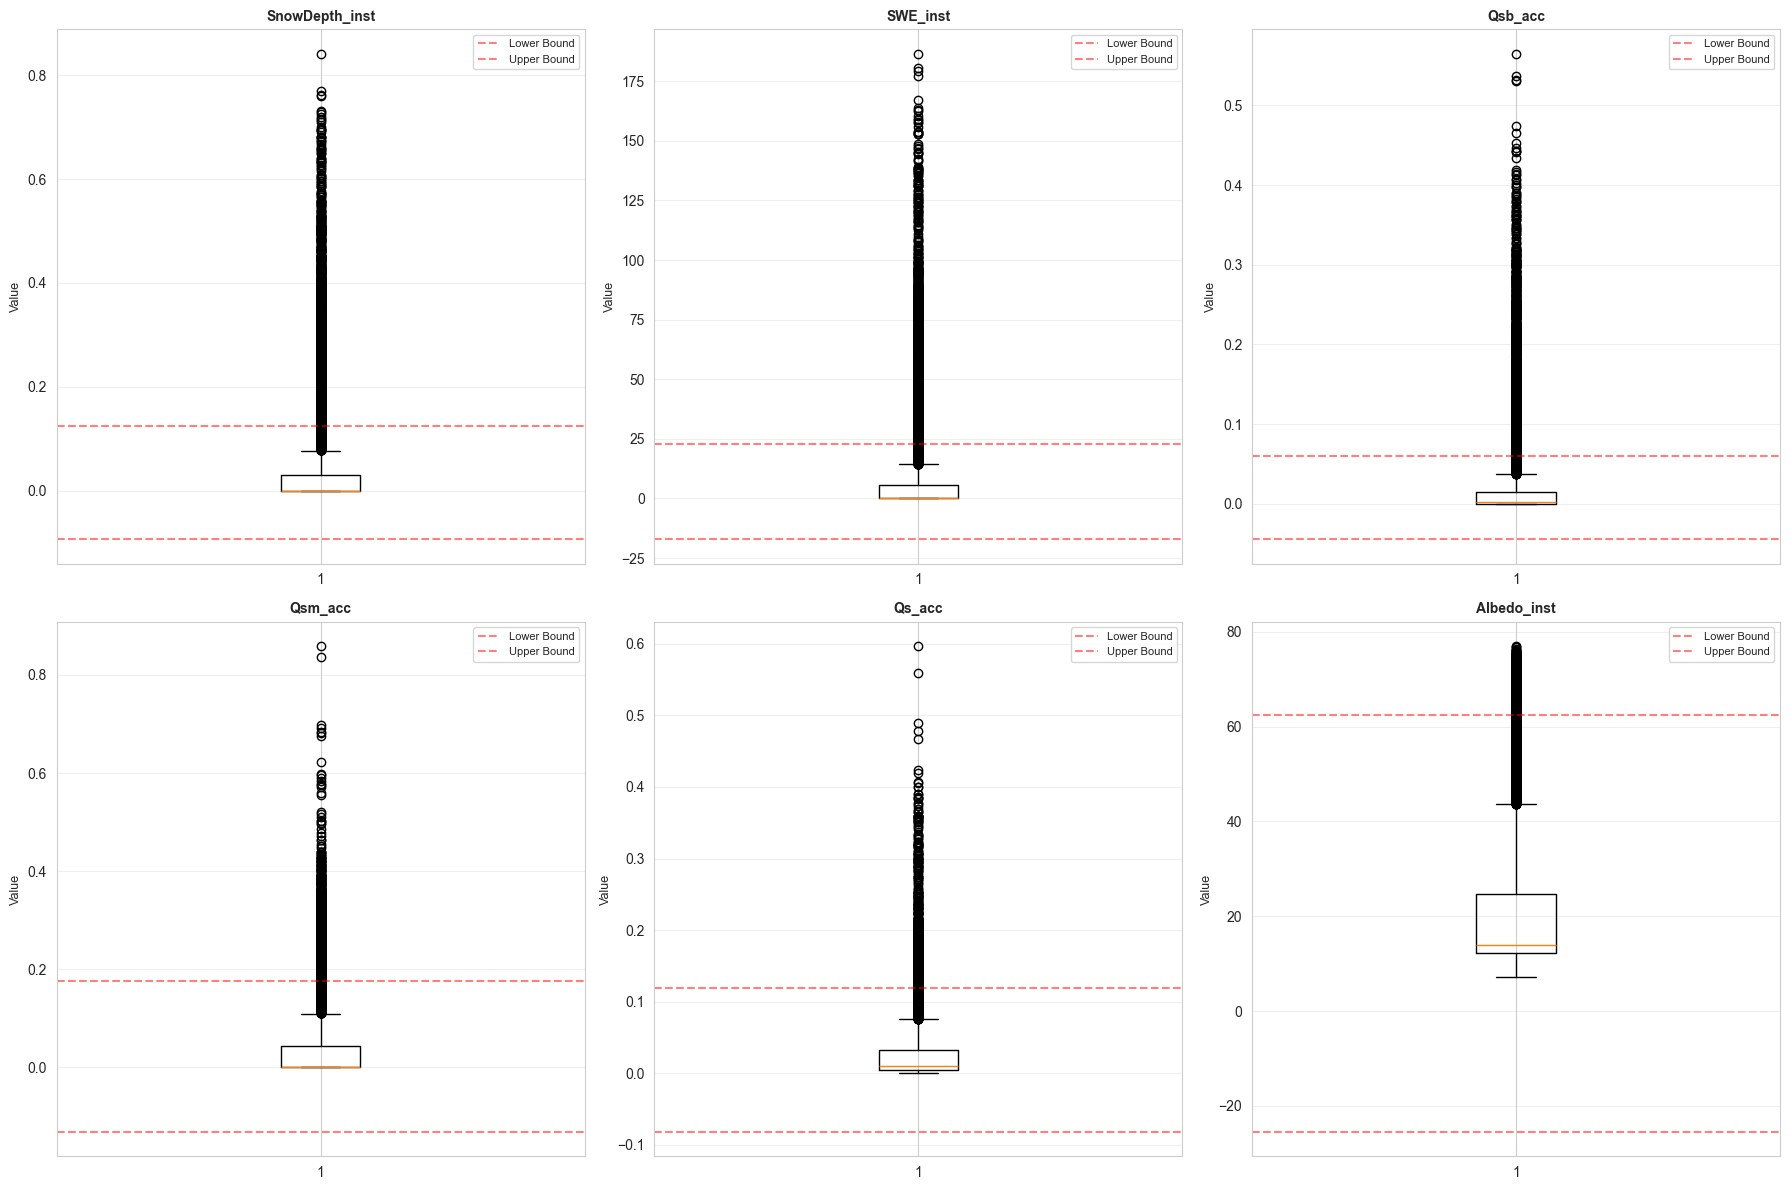

In [11]:
# Outlier detection using IQR method
print("="*80)
print("OUTLIER DETECTION (3×IQR METHOD)")
print("="*80)

if len(feature_cols) > 0:
    outlier_summary = []
    
    for col in feature_cols[:30]:  # Analyze top 30 features
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        
        lower_bound = Q1 - 3 * IQR
        upper_bound = Q3 + 3 * IQR
        
        outliers = ((df[col] < lower_bound) | (df[col] > upper_bound)).sum()
        outlier_pct = (outliers / len(df)) * 100
        
        if outliers > 0:
            outlier_summary.append({
                'Feature': col,
                'Outliers': outliers,
                'Outlier_Percent': outlier_pct,
                'Lower_Bound': lower_bound,
                'Upper_Bound': upper_bound
            })
    
    if outlier_summary:
        outlier_df = pd.DataFrame(outlier_summary).sort_values('Outliers', ascending=False)
        
        print(f"\nFeatures with outliers:")
        print(outlier_df.head(20).to_string(index=False))
        
        # Visualize outliers for top features
        top_outlier_features = outlier_df.head(6)['Feature'].tolist()
        
        fig, axes = plt.subplots(2, 3, figsize=(18, 12))
        axes = axes.flatten()
        
        for idx, feat in enumerate(top_outlier_features):
            Q1 = df[feat].quantile(0.25)
            Q3 = df[feat].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 3 * IQR
            upper_bound = Q3 + 3 * IQR
            
            axes[idx].boxplot(df[feat].dropna(), vert=True)
            axes[idx].axhline(lower_bound, color='r', linestyle='--', alpha=0.5, label='Lower Bound')
            axes[idx].axhline(upper_bound, color='r', linestyle='--', alpha=0.5, label='Upper Bound')
            axes[idx].set_title(f'{feat[:30]}', fontsize=10, fontweight='bold')
            axes[idx].set_ylabel('Value', fontsize=9)
            axes[idx].legend(fontsize=8)
            axes[idx].grid(alpha=0.3, axis='y')
        
        plt.tight_layout()
        plt.savefig('EDA_outlier_detection.png', dpi=300, bbox_inches='tight')
        print("\n✓ Saved: EDA_outlier_detection.png")
        plt.show()
    else:
        print("\nNo significant outliers detected using 3×IQR method.")
else:
    print("No feature columns available for outlier detection.")



## 8. Principal Component Analysis (PCA)



PRINCIPAL COMPONENT ANALYSIS (PCA)

Features for PCA: 49
Samples: 14,007

Explained Variance by Component:
  PC1: 49.23% (Cumulative: 49.23%)
  PC2: 19.82% (Cumulative: 69.05%)
  PC3: 9.10% (Cumulative: 78.16%)
  PC4: 4.47% (Cumulative: 82.63%)
  PC5: 3.09% (Cumulative: 85.72%)
  PC6: 2.45% (Cumulative: 88.17%)
  PC7: 2.00% (Cumulative: 90.17%)
  PC8: 1.42% (Cumulative: 91.59%)
  PC9: 1.04% (Cumulative: 92.63%)
  PC10: 0.97% (Cumulative: 93.60%)

Components needed for 90% variance: 7
Components needed for 95% variance: 12

✓ Saved: EDA_PCA_analysis.png


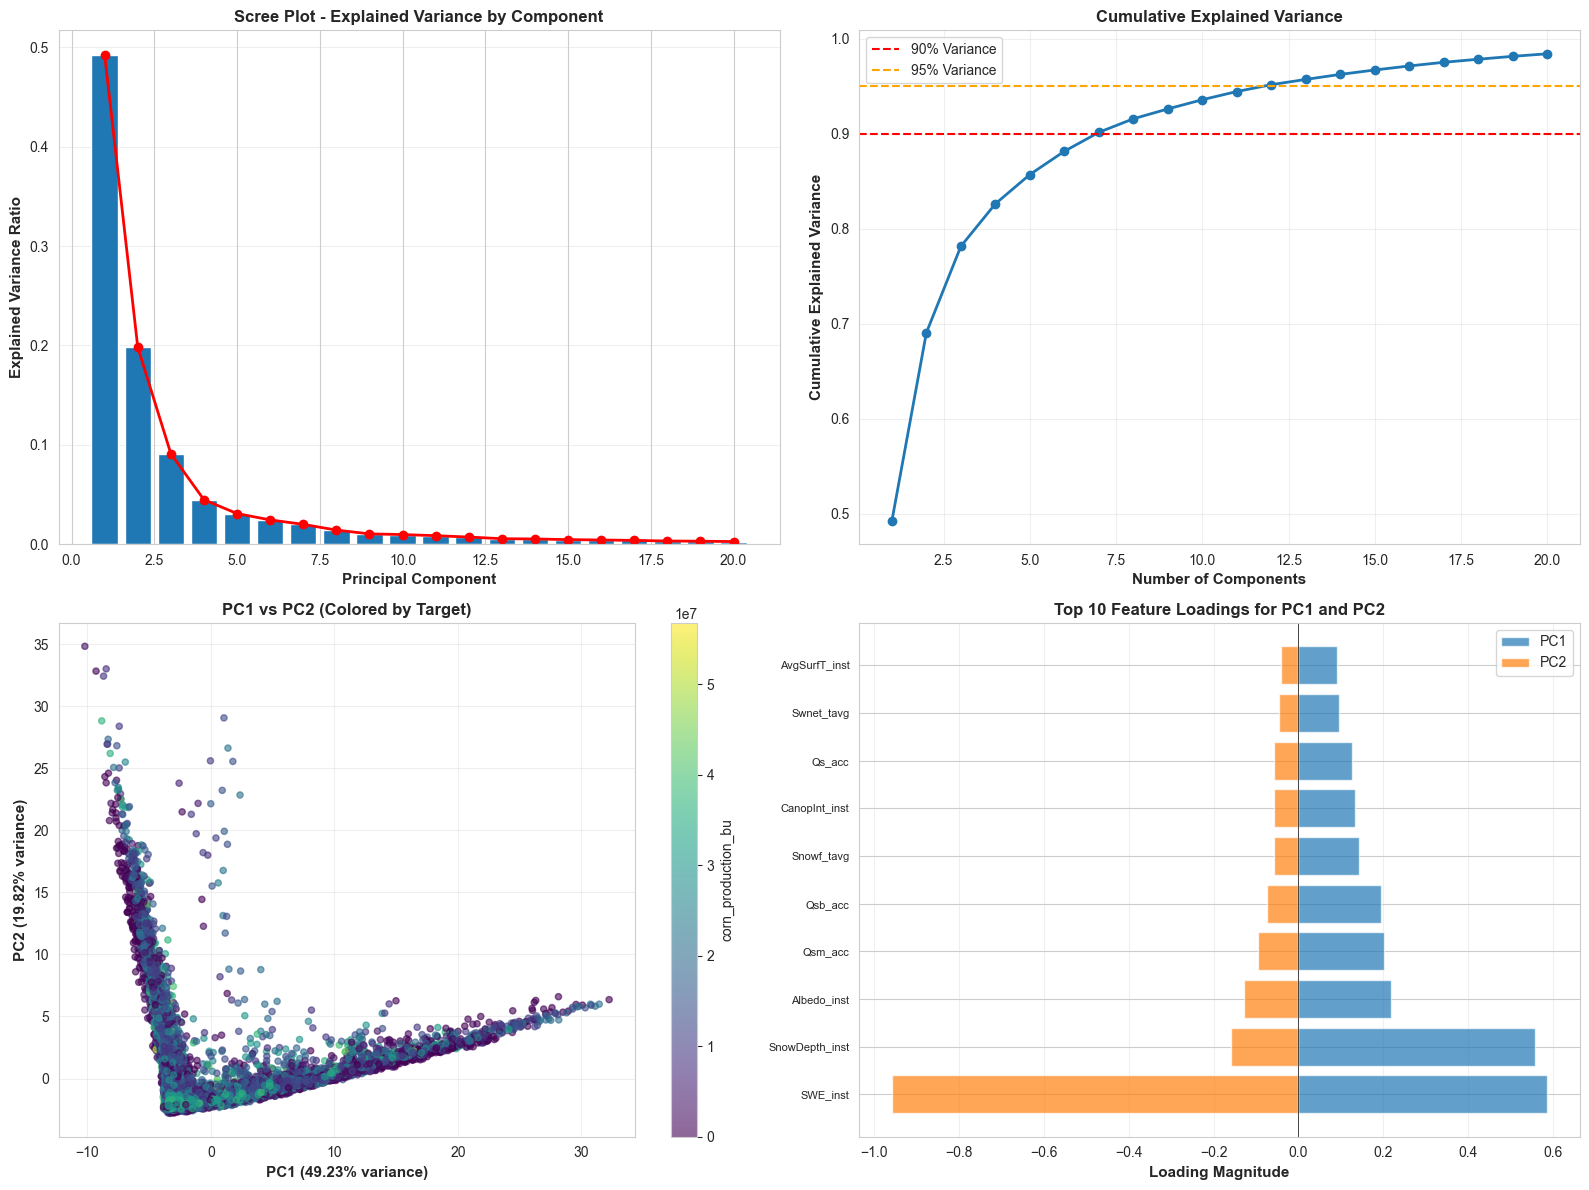


Top 10 Features in PC1:
SWE_inst          0.585558
SnowDepth_inst    0.557767
Albedo_inst       0.218850
Qsm_acc           0.201194
Qsb_acc           0.195306
Snowf_tavg        0.142441
CanopInt_inst     0.132585
Qs_acc            0.125056
Swnet_tavg        0.095257
AvgSurfT_inst     0.091443

Top 10 Features in PC2:
Qsb_acc                  0.957051
SWE_inst                 0.159850
SnowDepth_inst           0.129383
SoilMoi100_200cm_inst    0.094975
SoilMoi40_100cm_inst     0.073780
Rainf_f_tavg             0.058242
SoilMoi0_10cm_inst       0.058115
SoilMoi10_40cm_inst      0.057659
Rainf_tavg               0.046044
Qsm_acc                  0.041798


In [12]:
# PCA Analysis
print("="*80)
print("PRINCIPAL COMPONENT ANALYSIS (PCA)")
print("="*80)

if len(feature_cols) > 0:
    # Prepare data for PCA
    X_pca = df[feature_cols].copy()
    
    # Handle missing values
    X_pca = X_pca.fillna(X_pca.median())
    
    # Scale features
    scaler = RobustScaler()
    X_scaled = scaler.fit_transform(X_pca)
    
    print(f"\nFeatures for PCA: {len(feature_cols)}")
    print(f"Samples: {X_scaled.shape[0]:,}")
    
    # Perform PCA
    pca = PCA()
    X_pca_transformed = pca.fit_transform(X_scaled)
    
    # Explained variance
    explained_variance = pca.explained_variance_ratio_
    cumulative_variance = np.cumsum(explained_variance)
    
    print(f"\nExplained Variance by Component:")
    for i in range(min(10, len(explained_variance))):
        print(f"  PC{i+1}: {explained_variance[i]*100:.2f}% (Cumulative: {cumulative_variance[i]*100:.2f}%)")
    
    # Find number of components for 90% variance
    n_components_90 = np.argmax(cumulative_variance >= 0.90) + 1
    print(f"\nComponents needed for 90% variance: {n_components_90}")
    print(f"Components needed for 95% variance: {np.argmax(cumulative_variance >= 0.95) + 1}")
    
    # Visualization
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    
    # Scree plot
    n_components_plot = min(20, len(explained_variance))
    axes[0, 0].bar(range(1, n_components_plot + 1), explained_variance[:n_components_plot])
    axes[0, 0].plot(range(1, n_components_plot + 1), explained_variance[:n_components_plot], 'ro-', linewidth=2)
    axes[0, 0].set_xlabel('Principal Component', fontsize=11, fontweight='bold')
    axes[0, 0].set_ylabel('Explained Variance Ratio', fontsize=11, fontweight='bold')
    axes[0, 0].set_title('Scree Plot - Explained Variance by Component', fontsize=12, fontweight='bold')
    axes[0, 0].grid(alpha=0.3, axis='y')
    
    # Cumulative explained variance
    axes[0, 1].plot(range(1, n_components_plot + 1), cumulative_variance[:n_components_plot], 'o-', linewidth=2, markersize=6)
    axes[0, 1].axhline(0.90, color='r', linestyle='--', label='90% Variance')
    axes[0, 1].axhline(0.95, color='orange', linestyle='--', label='95% Variance')
    axes[0, 1].set_xlabel('Number of Components', fontsize=11, fontweight='bold')
    axes[0, 1].set_ylabel('Cumulative Explained Variance', fontsize=11, fontweight='bold')
    axes[0, 1].set_title('Cumulative Explained Variance', fontsize=12, fontweight='bold')
    axes[0, 1].legend()
    axes[0, 1].grid(alpha=0.3)
    
    # PC1 vs PC2 scatter plot
    if TARGET_COL and TARGET_COL in df.columns:
        target_values = df[TARGET_COL].fillna(df[TARGET_COL].median())
        scatter = axes[1, 0].scatter(X_pca_transformed[:, 0], X_pca_transformed[:, 1], 
                                   c=target_values, cmap='viridis', alpha=0.6, s=20)
        axes[1, 0].set_xlabel(f'PC1 ({explained_variance[0]*100:.2f}% variance)', fontsize=11, fontweight='bold')
        axes[1, 0].set_ylabel(f'PC2 ({explained_variance[1]*100:.2f}% variance)', fontsize=11, fontweight='bold')
        axes[1, 0].set_title('PC1 vs PC2 (Colored by Target)', fontsize=12, fontweight='bold')
        plt.colorbar(scatter, ax=axes[1, 0], label=TARGET_COL)
    else:
        axes[1, 0].scatter(X_pca_transformed[:, 0], X_pca_transformed[:, 1], alpha=0.6, s=20)
        axes[1, 0].set_xlabel(f'PC1 ({explained_variance[0]*100:.2f}% variance)', fontsize=11, fontweight='bold')
        axes[1, 0].set_ylabel(f'PC2 ({explained_variance[1]*100:.2f}% variance)', fontsize=11, fontweight='bold')
        axes[1, 0].set_title('PC1 vs PC2', fontsize=12, fontweight='bold')
    axes[1, 0].grid(alpha=0.3)
    
    # Component loadings (top features for PC1 and PC2)
    pc1_loadings = pd.Series(pca.components_[0], index=feature_cols).abs().sort_values(ascending=False)
    pc2_loadings = pd.Series(pca.components_[1], index=feature_cols).abs().sort_values(ascending=False)
    
    top_pc1 = pc1_loadings.head(10)
    top_pc2 = pc2_loadings.head(10)
    
    axes[1, 1].barh(range(len(top_pc1)), top_pc1.values, alpha=0.7, label='PC1')
    axes[1, 1].barh(range(len(top_pc2)), -top_pc2.values, alpha=0.7, label='PC2')
    axes[1, 1].set_yticks(range(len(top_pc1)))
    axes[1, 1].set_yticklabels(top_pc1.index, fontsize=8)
    axes[1, 1].set_xlabel('Loading Magnitude', fontsize=11, fontweight='bold')
    axes[1, 1].set_title('Top 10 Feature Loadings for PC1 and PC2', fontsize=12, fontweight='bold')
    axes[1, 1].legend()
    axes[1, 1].grid(alpha=0.3, axis='x')
    axes[1, 1].axvline(0, color='black', linewidth=0.5)
    
    plt.tight_layout()
    plt.savefig('EDA_PCA_analysis.png', dpi=300, bbox_inches='tight')
    print("\n✓ Saved: EDA_PCA_analysis.png")
    plt.show()
    
    # Print top loadings
    print("\nTop 10 Features in PC1:")
    print(pc1_loadings.head(10).to_string())
    print("\nTop 10 Features in PC2:")
    print(pc2_loadings.head(10).to_string())
    
else:
    print("No feature columns available for PCA.")



## 9. K-Nearest Neighbors Analysis



K-NEAREST NEIGHBORS (KNN) ANALYSIS

Analyzing 14,007 samples with 49 features
Using PCA (2 components) for visualization: 69.05% variance explained

✓ Saved: EDA_KNN_analysis.png


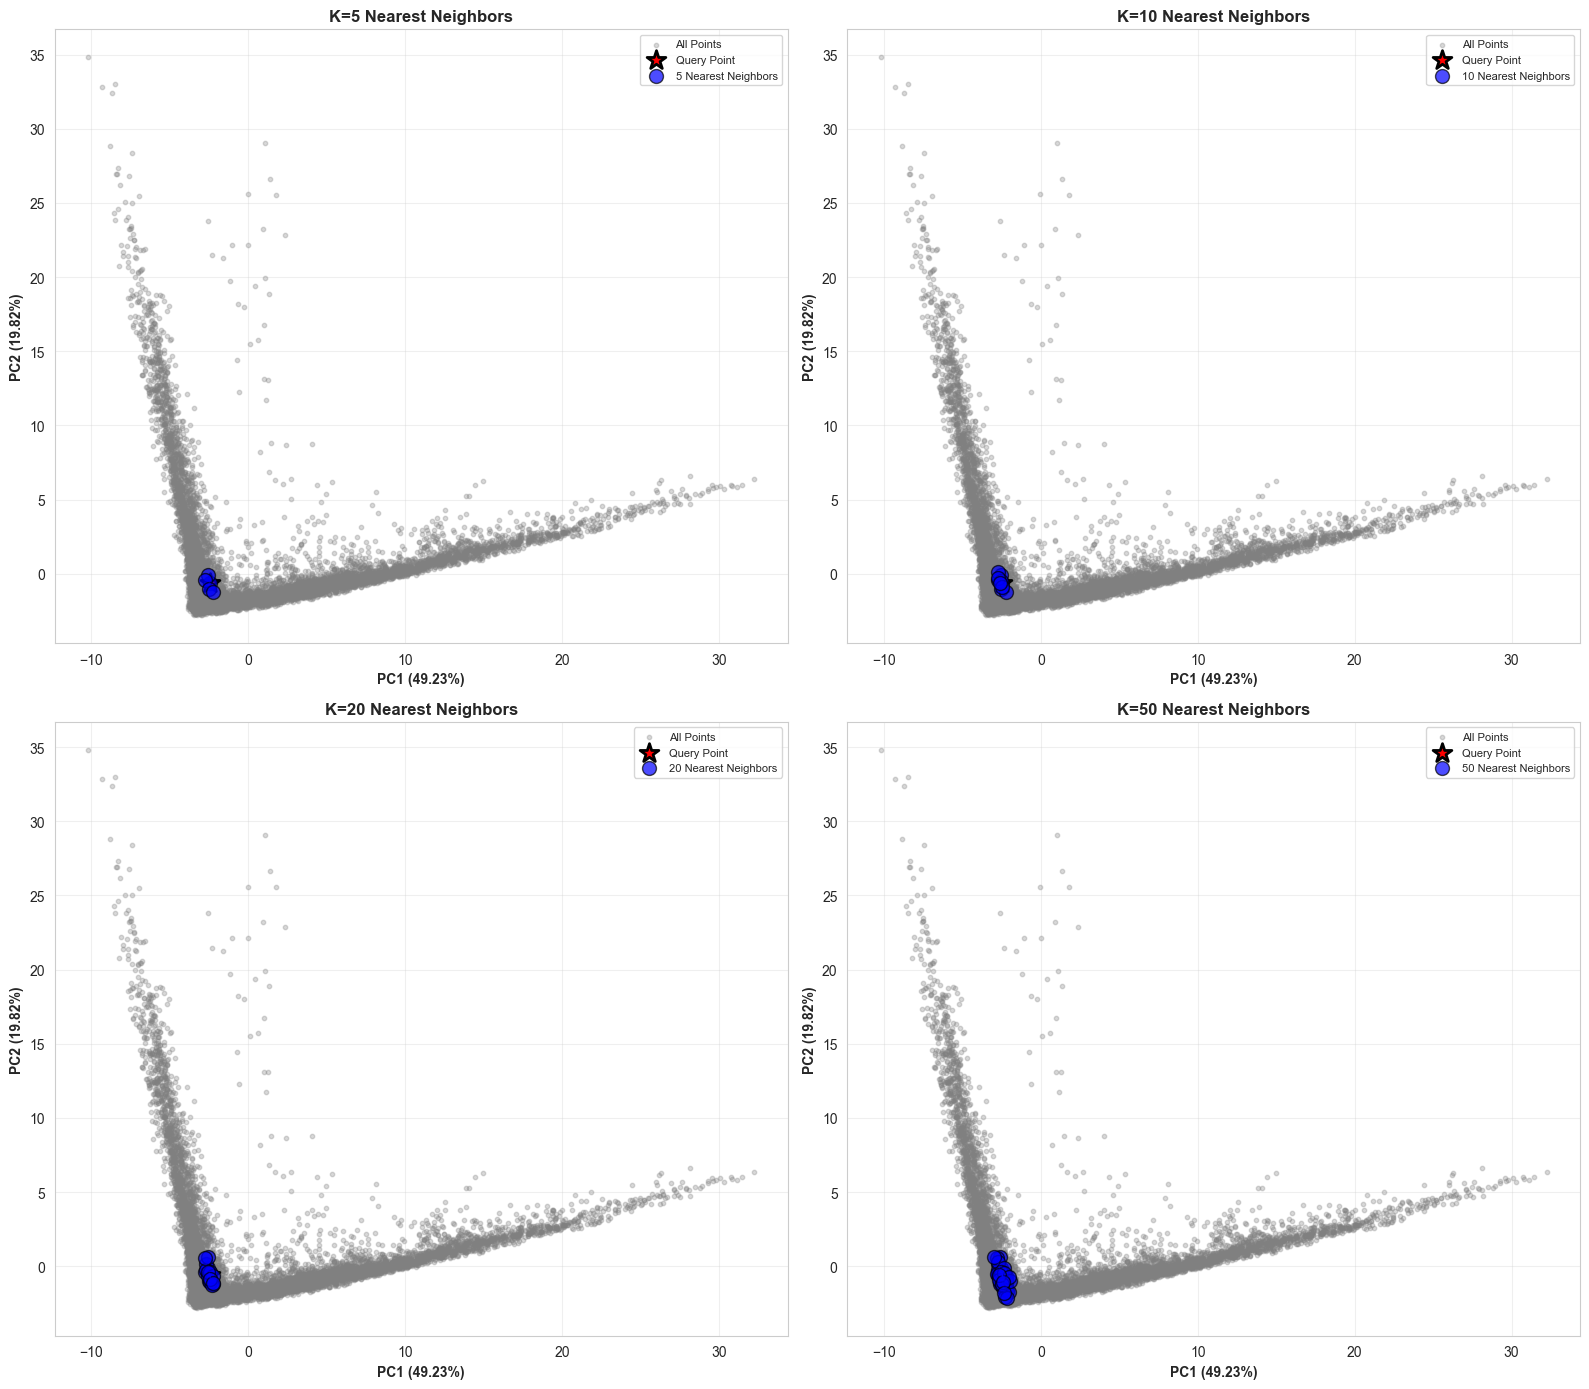

✓ Saved: EDA_KNN_distances.png


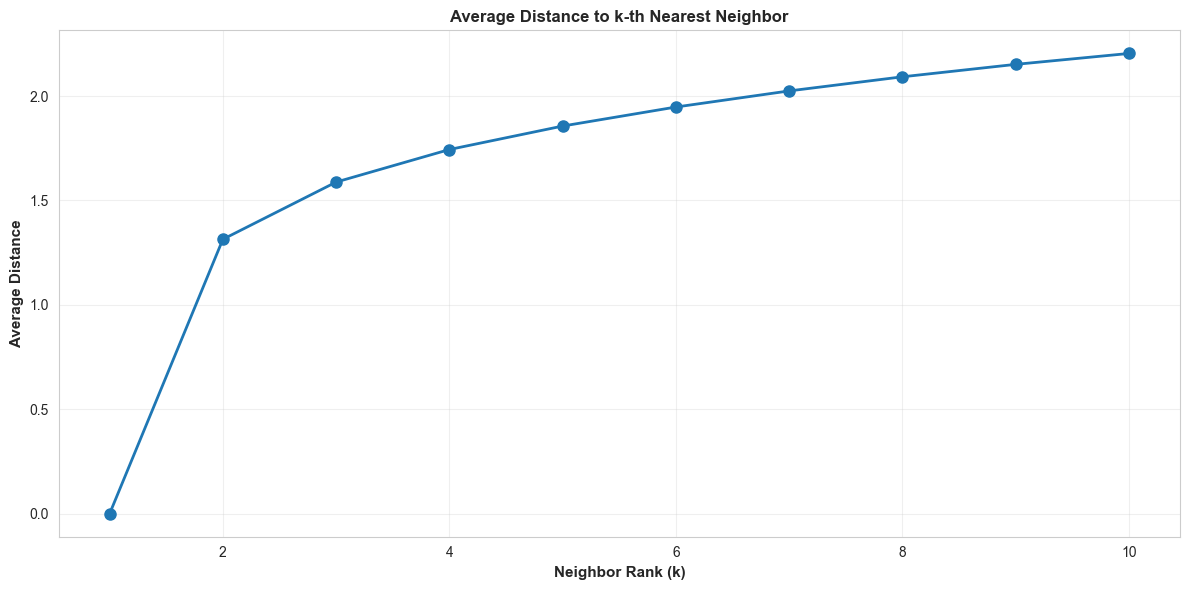


Average distances to nearest neighbors:
  1-th neighbor: 0.0000
  2-th neighbor: 1.3142
  3-th neighbor: 1.5882
  4-th neighbor: 1.7441
  5-th neighbor: 1.8564
  6-th neighbor: 1.9475
  7-th neighbor: 2.0247
  8-th neighbor: 2.0923
  9-th neighbor: 2.1519


In [13]:
# K-Nearest Neighbors analysis
print("="*80)
print("K-NEAREST NEIGHBORS (KNN) ANALYSIS")
print("="*80)

if len(feature_cols) > 0:
    # Prepare data
    X_knn = df[feature_cols].copy()
    X_knn = X_knn.fillna(X_knn.median())
    
    # Scale features
    scaler = RobustScaler()
    X_knn_scaled = scaler.fit_transform(X_knn)
    
    # Use PCA for dimensionality reduction for visualization
    pca_knn = PCA(n_components=2)
    X_knn_pca = pca_knn.fit_transform(X_knn_scaled)
    
    print(f"\nAnalyzing {len(X_knn_scaled):,} samples with {len(feature_cols)} features")
    print(f"Using PCA (2 components) for visualization: {pca_knn.explained_variance_ratio_.sum()*100:.2f}% variance explained")
    
    # Fit KNN model
    k_values = [5, 10, 20, 50]
    
    fig, axes = plt.subplots(2, 2, figsize=(16, 14))
    axes = axes.flatten()
    
    for idx, k in enumerate(k_values):
        knn = NearestNeighbors(n_neighbors=k)
        knn.fit(X_knn_scaled)
        
        # Find neighbors for a sample
        sample_idx = len(X_knn_scaled) // 2  # Middle sample
        distances, indices = knn.kneighbors([X_knn_scaled[sample_idx]])
        
        # Plot in PCA space
        axes[idx].scatter(X_knn_pca[:, 0], X_knn_pca[:, 1], alpha=0.3, s=10, c='gray', label='All Points')
        axes[idx].scatter(X_knn_pca[sample_idx, 0], X_knn_pca[sample_idx, 1], 
                        s=200, c='red', marker='*', label='Query Point', edgecolors='black', linewidths=2)
        axes[idx].scatter(X_knn_pca[indices[0], 0], X_knn_pca[indices[0], 1], 
                        s=100, c='blue', marker='o', label=f'{k} Nearest Neighbors', 
                        edgecolors='black', linewidths=1, alpha=0.7)
        
        # Draw lines to neighbors
        for neighbor_idx in indices[0]:
            axes[idx].plot([X_knn_pca[sample_idx, 0], X_knn_pca[neighbor_idx, 0]],
                         [X_knn_pca[sample_idx, 1], X_knn_pca[neighbor_idx, 1]],
                         'b--', alpha=0.3, linewidth=0.5)
        
        axes[idx].set_xlabel(f'PC1 ({pca_knn.explained_variance_ratio_[0]*100:.2f}%)', fontsize=10, fontweight='bold')
        axes[idx].set_ylabel(f'PC2 ({pca_knn.explained_variance_ratio_[1]*100:.2f}%)', fontsize=10, fontweight='bold')
        axes[idx].set_title(f'K={k} Nearest Neighbors', fontsize=12, fontweight='bold')
        axes[idx].legend(fontsize=8)
        axes[idx].grid(alpha=0.3)
    
    plt.tight_layout()
    plt.savefig('EDA_KNN_analysis.png', dpi=300, bbox_inches='tight')
    print("\n✓ Saved: EDA_KNN_analysis.png")
    plt.show()
    
    # Distance distribution analysis
    knn_all = NearestNeighbors(n_neighbors=10)
    knn_all.fit(X_knn_scaled)
    distances_all, _ = knn_all.kneighbors(X_knn_scaled)
    
    # Average distance to k-th neighbor
    avg_distances = distances_all.mean(axis=0)
    
    plt.figure(figsize=(12, 6))
    plt.plot(range(1, 11), avg_distances[:10], 'o-', linewidth=2, markersize=8)
    plt.xlabel('Neighbor Rank (k)', fontsize=11, fontweight='bold')
    plt.ylabel('Average Distance', fontsize=11, fontweight='bold')
    plt.title('Average Distance to k-th Nearest Neighbor', fontsize=12, fontweight='bold')
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.savefig('EDA_KNN_distances.png', dpi=300, bbox_inches='tight')
    print("✓ Saved: EDA_KNN_distances.png")
    plt.show()
    
    print(f"\nAverage distances to nearest neighbors:")
    for k in range(1, min(11, len(avg_distances))):
        print(f"  {k}-th neighbor: {avg_distances[k-1]:.4f}")
        
else:
    print("No feature columns available for KNN analysis.")



## 10. Feature Distribution Analysis



FEATURE DISTRIBUTION ANALYSIS

Analyzing distributions of top 12 features:
  - corn_acres_planted
  - income_farmrelated_receipts_total_usd
  - dist_km_ethanol
  - SoilMoi100_200cm_inst
  - govt_programs_federal_receipts_usd
  - income_farmrelated_receipts_per_operation_usd
  - ESoil_tavg
  - Wind_f_inst
  - SoilMoi10_40cm_inst
  - SoilMoi40_100cm_inst
  - SoilTMP100_200cm_inst
  - SoilMoi0_10cm_inst

✓ Saved: EDA_feature_distributions.png


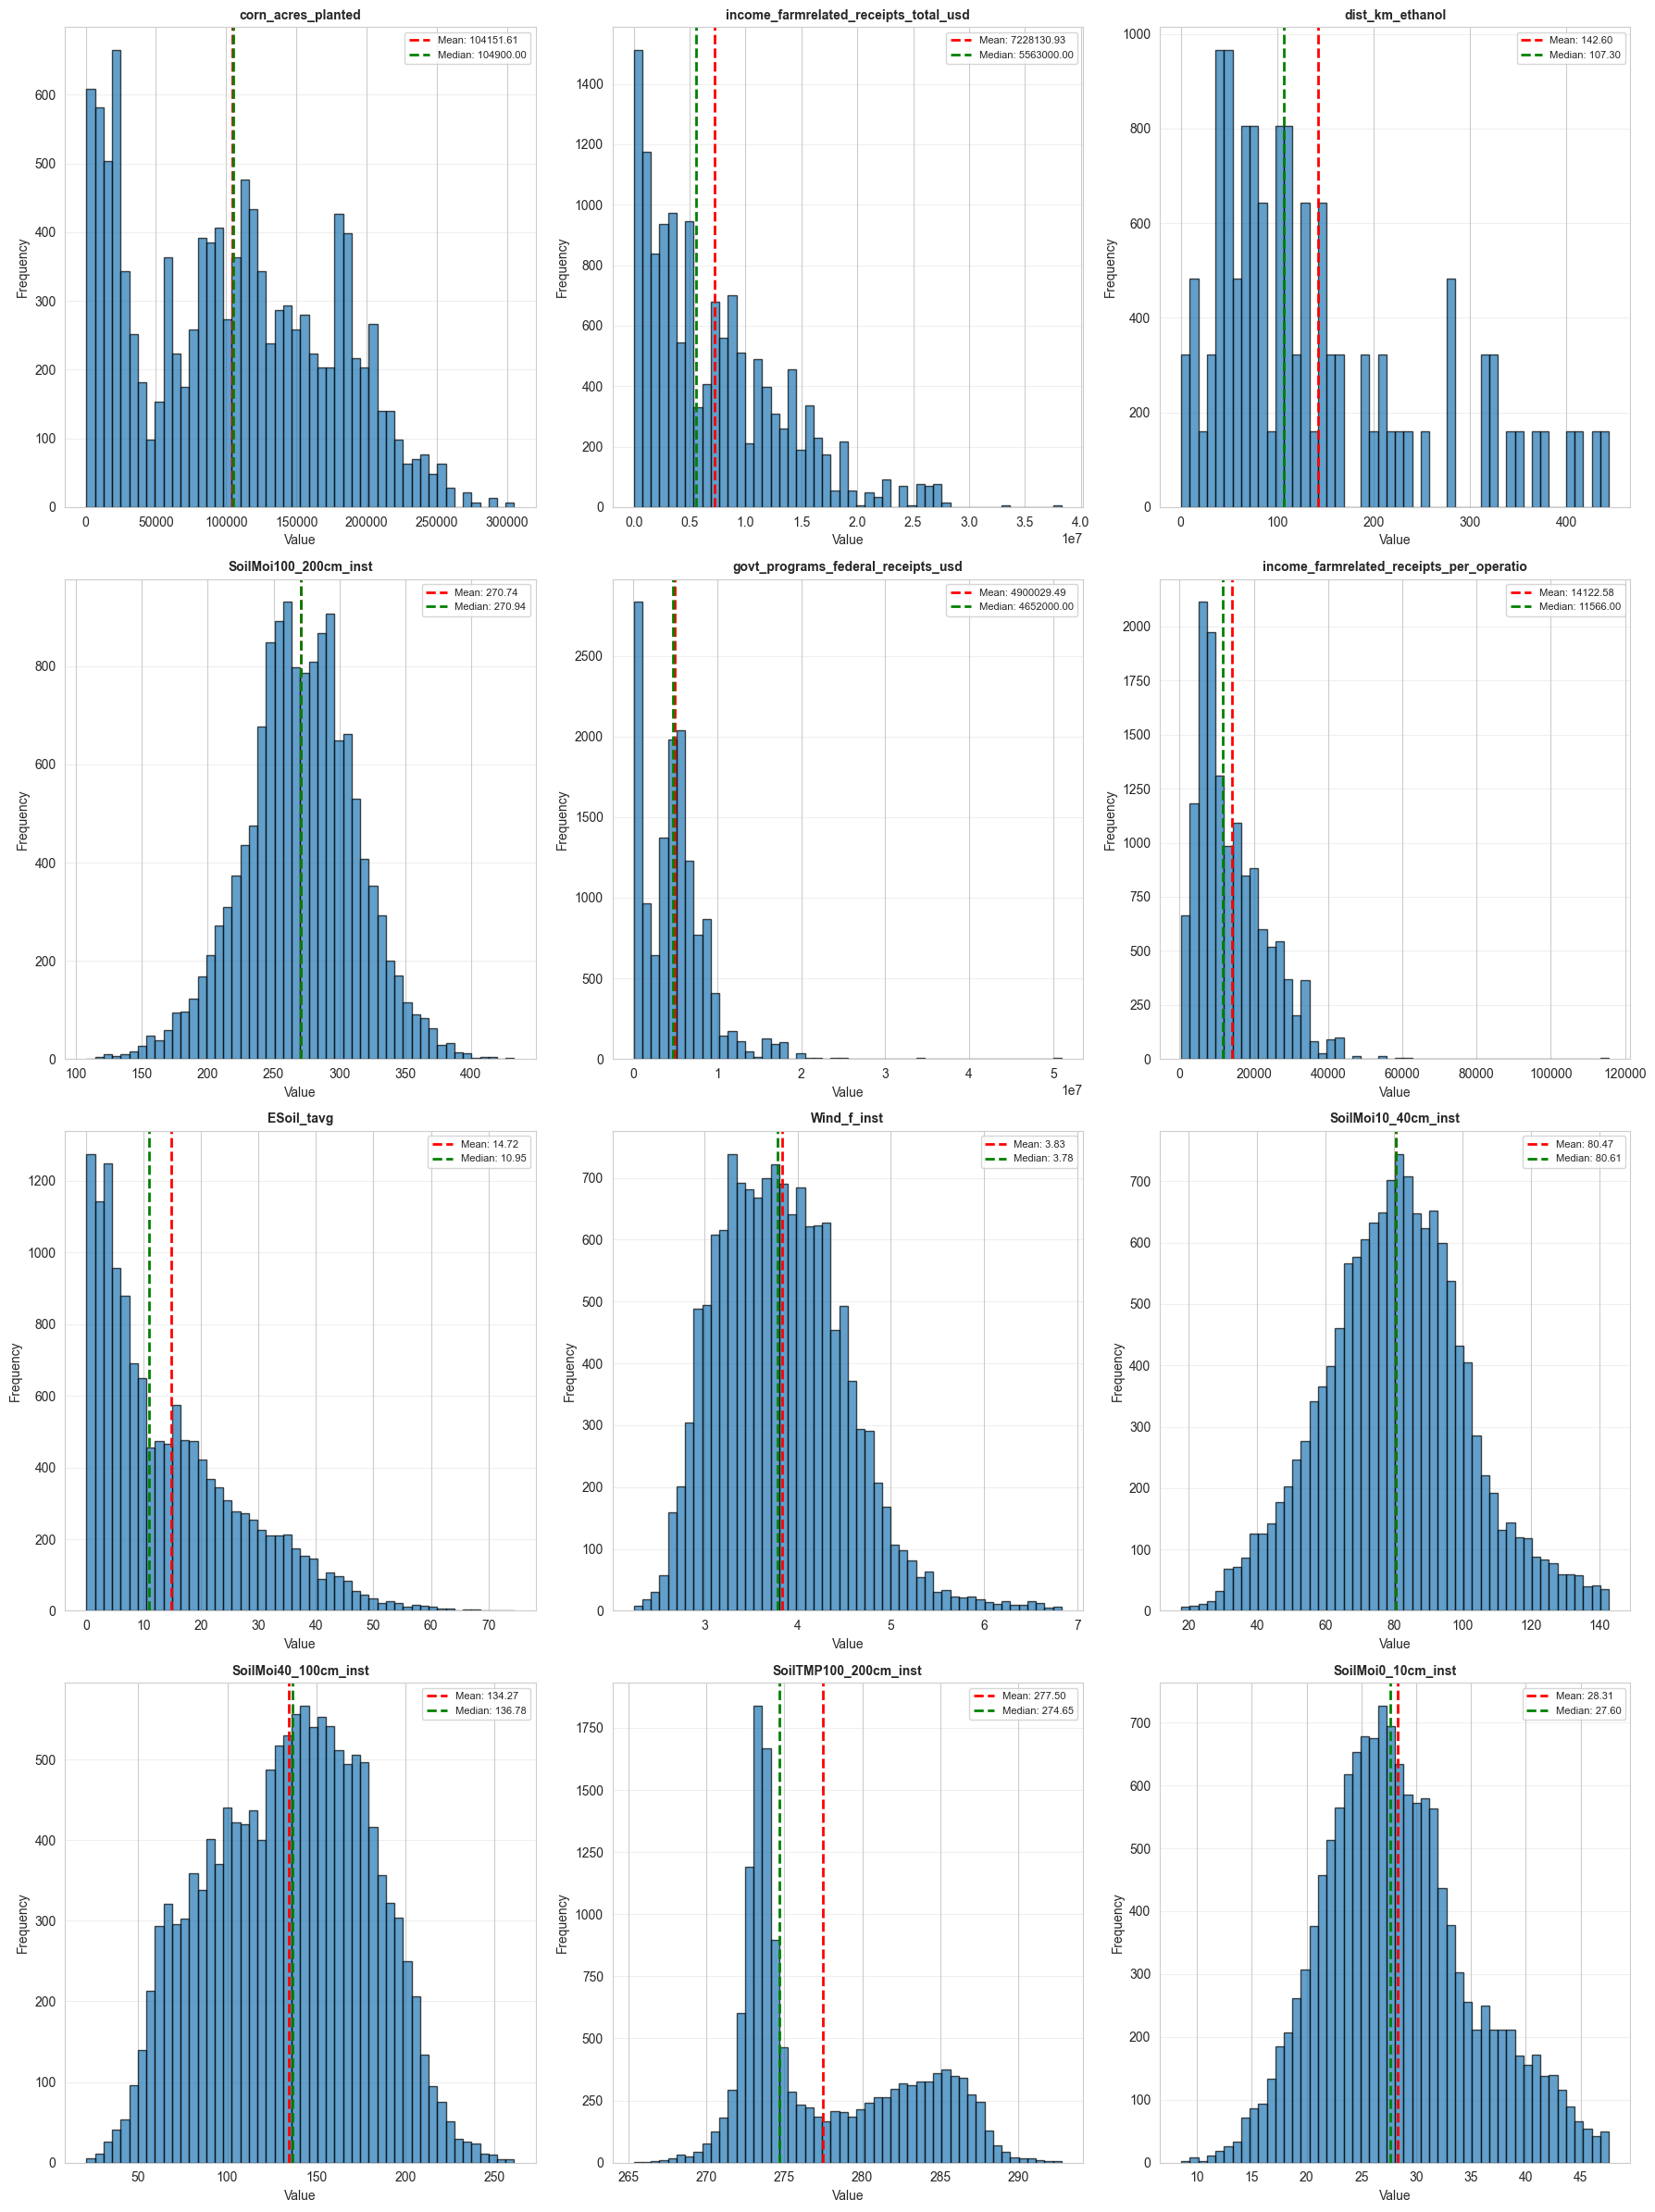

In [14]:
# Feature distribution analysis for top features
print("="*80)
print("FEATURE DISTRIBUTION ANALYSIS")
print("="*80)

if len(feature_cols) > 0:
    # Select top features (by variance or correlation with target)
    if TARGET_COL and TARGET_COL in df.columns:
        target_corr_sorted = df[numeric_cols].corr()[TARGET_COL].abs().sort_values(ascending=False)
        top_features = target_corr_sorted.drop(TARGET_COL).head(12).index.tolist()
    else:
        feature_variance = df[feature_cols].var().sort_values(ascending=False)
        top_features = feature_variance.head(12).index.tolist()
    
    print(f"\nAnalyzing distributions of top {len(top_features)} features:")
    for feat in top_features:
        print(f"  - {feat}")
    
    # Create subplots
    n_features = len(top_features)
    n_cols = 3
    n_rows = (n_features + n_cols - 1) // n_cols
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 6*n_rows))
    axes = axes.flatten() if n_rows > 1 else [axes] if n_features == 1 else axes
    
    for idx, feat in enumerate(top_features):
        if idx < len(axes):
            data = df[feat].dropna()
            
            axes[idx].hist(data, bins=50, edgecolor='black', alpha=0.7)
            axes[idx].axvline(data.mean(), color='r', linestyle='--', linewidth=2, label=f'Mean: {data.mean():.2f}')
            axes[idx].axvline(data.median(), color='g', linestyle='--', linewidth=2, label=f'Median: {data.median():.2f}')
            axes[idx].set_xlabel('Value', fontsize=10)
            axes[idx].set_ylabel('Frequency', fontsize=10)
            axes[idx].set_title(f'{feat[:40]}', fontsize=10, fontweight='bold')
            axes[idx].legend(fontsize=8)
            axes[idx].grid(alpha=0.3, axis='y')
    
    # Hide unused subplots
    for idx in range(len(top_features), len(axes)):
        axes[idx].axis('off')
    
    plt.tight_layout()
    plt.savefig('EDA_feature_distributions.png', dpi=300, bbox_inches='tight')
    print("\n✓ Saved: EDA_feature_distributions.png")
    plt.show()
    
else:
    print("No feature columns available for distribution analysis.")



## 11. Summary and Key Insights



In [ ]:
# Generate summary report
print("="*80)
print("EXPLORATORY DATA ANALYSIS SUMMARY")
print("="*80)

print(f"\nDataset Overview:")
print(f"  Total Rows: {df.shape[0]:,}")
print(f"  Total Columns: {df.shape[1]}")
print(f"  Feature Columns: {len(feature_cols)}")
print(f"  Memory Usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

if 'year' in df.columns:
    print(f"\nTemporal Coverage:")
    print(f"  Year Range: {df['year'].min()} - {df['year'].max()}")
    print(f"  Unique Years: {df['year'].nunique()}")

if 'fips' in df.columns:
    print(f"\nSpatial Coverage:")
    print(f"  Unique Counties (FIPS): {df['fips'].nunique()}")

if TARGET_COL and TARGET_COL in df.columns:
    target = df[TARGET_COL].dropna()
    print(f"\nTarget Variable ({TARGET_COL}):")
    print(f"  Non-null Count: {len(target):,}")
    print(f"  Range: {target.min():,.0f} - {target.max():,.0f} bushels")
    print(f"  Mean: {target.mean():,.0f} bushels")
    print(f"  Skewness: {target.skew():.4f}")

missing_total = df.isnull().sum().sum()
print(f"\nData Quality:")
print(f"  Total Missing Values: {missing_total:,}")
print(f"  Missing Percentage: {(missing_total / (df.shape[0] * df.shape[1]) * 100):.2f}%")
print(f"  Columns with Missing Data: {(df.isnull().sum() > 0).sum()}")

print(f"\n" + "="*80)
print("EDA COMPLETE - ALL VISUALIZATIONS SAVED")
print("="*80)
print("\nGenerated Files:")
print("  1. EDA_missing_values.png")
print("  2. EDA_target_distribution.png")
print("  3. EDA_temporal_analysis.png")
print("  4. EDA_correlation_target.png")
print("  5. EDA_correlation_heatmap.png")
print("  6. EDA_outlier_detection.png")
print("  7. EDA_PCA_analysis.png")
print("  8. EDA_KNN_analysis.png")
print("  9. EDA_KNN_distances.png")
print(" 10. EDA_feature_distributions.png")



EXPLORATORY DATA ANALYSIS SUMMARY

Dataset Overview:
  Total Rows: 14,007
  Total Columns: 54
  Feature Columns: 49
  Memory Usage: 6.41 MB

Temporal Coverage:
  Year Range: 2000 - 2022
  Unique Years: 23

Spatial Coverage:
  Unique Counties (FIPS): 87

Target Variable (corn_production_bu):
  Non-null Count: 14,007
  Range: 0 - 56,755,000 bushels
  Mean: 13,841,265 bushels
  Skewness: 0.6014

Data Quality:
  Total Missing Values: 2,247
  Missing Percentage: 0.30%
  Columns with Missing Data: 1

EDA COMPLETE - ALL VISUALIZATIONS SAVED

Generated Files:
  1. EDA_missing_values.png
  2. EDA_target_distribution.png
  3. EDA_temporal_analysis.png
  4. EDA_correlation_target.png
  5. EDA_correlation_heatmap.png
  6. EDA_outlier_detection.png
  7. EDA_PCA_analysis.png
  8. EDA_KNN_analysis.png
  9. EDA_KNN_distances.png
 10. EDA_feature_distributions.png


: 